# Final Assignment - Part 2

### Assignment Instructions

#### Part 2   |   Advanced Difficulty Level

In this second part, you will be working with a datasets containing information on indian startups' funding, including the startup's details, the funding it received, and the investors' information. 

In the usual `data` folder, you will find the following three datasets, including data from 2019, 2020 and 2021: 

- `startup_funding2019.csv`
- `startup_funding2020.csv`
- `startup_funding2021.csv`

At [this link](https://www.kaggle.com/datasets/omkargowda/indian-startups-funding-data?select=startup_funding2019.csv) you can find the source of the original data (Kaggle) as well as more information on its composition *(note: the files in the data folder are slightly different from the originals)*.

1. Using a **for loop**, load all three .csv files in a temporary DataFrame called `df_tmp` and, at each cycle, add a new column named `Year` that includes the year of that csv file to the temporary table and append it to a final DataFrame named `fnd`. Your final `fnd` DataFrame should include the contents from all three csv files stacked one on top of the other. 

    What is the **shape** of the `fnd` DataFrame? 

In [20]:
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
csv_files = ["data/startup_funding2019.csv", "data/startup_funding2020.csv", "data/startup_funding2021.csv"]
fnd = pd.DataFrame()
for file in csv_files:
        df_tmp = pd.read_csv(file)
        year = file.split('startup_funding')[1].split('.csv')[0]
        df_tmp['Year'] = year
        fnd = pd.concat([fnd, df_tmp], ignore_index=True)
fnd.shape

(2343, 10)

2. If you check the columns' data types, you'll notice that the columns `Founded`, `Amount($)` and `Year` are being interpreted as strings instead of numbers. Format those three columns to numeric data types. 

    What is the **total** `Amount($)` of funding given in the three years available?

In [23]:
fnd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  2343 non-null   object
 1   Founded        2102 non-null   object
 2   HeadQuarter    2228 non-null   object
 3   Sector         2325 non-null   object
 4   What it does   2343 non-null   object
 5   Founders       2324 non-null   object
 6   Investor       2243 non-null   object
 7   Amount($)      2211 non-null   object
 8   Stage          1220 non-null   object
 9   Year           2343 non-null   object
dtypes: object(10)
memory usage: 183.2+ KB


In [ ]:
#Data QC in case there are numbers not located in the proper column
fnd_anomaly=fnd[fnd["Founded"].str.contains(r'\$', na=False)]
fnd_anomaly=fnd[fnd["HeadQuarter"].str.contains(r'\$', na=False)]
fnd_anomaly=fnd[fnd["Sector"].str.contains(r'\$', na=False)]
fnd_anomaly=fnd[fnd["What it does"].str.contains(r'\$', na=False)]
fnd_anomaly=fnd[fnd["Founders"].str.contains(r'\$', na=False)]
fnd_anomaly=fnd[fnd["Stage"].str.contains(r'\$', na=False)]
fnd["Year"] = fnd["Year"].astype(str)
fnd_anomaly=fnd[fnd["Year"].str.contains(r'\$', na=False)]
fnd["Year"]= fnd["Year"].astype(int)
fnd_anomaly=fnd[fnd["Investor"].str.contains(r'\$', na=False)]
fnd_anomaly
#I found out an anomaly in the "Investor" column where there are three values belonging to the "Amount($)" column, in the next boxes of code I will solve it

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year
1391,MoEVing,2021,Gurugram\t#REF!,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,NaN,Seed,2021
1679,AdmitKard,2016,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000,NaN,Pre-series A,2021
2234,Sochcast,2020,Online Media\t#REF!,Sochcast is an Audio experiences company that ...,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,NaN,NaN,2021


In [25]:
x=fnd[fnd["Company/Brand"]=="AdmitKard"]["Investor"].values[0]
print(x)
fnd.loc[1679, "Amount($)"]=x
fnd.loc[1679, "Investor"]="Missing"
fnd.loc[1679]

$1000000


Company/Brand                                            AdmitKard
Founded                                                       2016
HeadQuarter                                                  Noida
Sector                                                      EdTech
What it does     A tech solution for end to end career advisory...
Founders          Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!
Investor                                                   Missing
Amount($)                                                 $1000000
Stage                                                 Pre-series A
Year                                                          2021
Name: 1679, dtype: object

In [26]:
y=fnd[fnd["Company/Brand"]=="MoEVing"]["Investor"].values[0]
print(y)
fnd.loc[1391, "Amount($)"]=y
fnd.loc[1391, "Investor"]="Missing"
fnd.loc[1391]

$5000000


Company/Brand                                              MoEVing
Founded                                                       2021
HeadQuarter                                        Gurugram\t#REF!
Sector           MoEVing is India's only Electric Mobility focu...
What it does                           Vikash Mishra, Mragank Jain
Founders            Anshuman Maheshwary, Dr Srihari Raju Kalidindi
Investor                                                   Missing
Amount($)                                                 $5000000
Stage                                                         Seed
Year                                                          2021
Name: 1391, dtype: object

In [27]:
z=fnd[fnd["Company/Brand"]=="Sochcast"]["Investor"].values[0]
print(z)
fnd.loc[2234, "Amount($)"]=z
fnd.loc[2234, "Investor"]="Missing"
fnd.loc[2234]

$Undisclosed


Company/Brand                                             Sochcast
Founded                                                       2020
HeadQuarter                                    Online Media\t#REF!
Sector           Sochcast is an Audio experiences company that ...
What it does     CA Harvinderjit Singh Bhatia, Garima Surana, A...
Founders                   Vinners, Raj Nayak, Amritaanshu Agrawal
Investor                                                   Missing
Amount($)                                             $Undisclosed
Stage                                                          NaN
Year                                                          2021
Name: 2234, dtype: object

In [29]:
fnd["Founded"]=pd.to_numeric(fnd["Founded"],errors="coerce").fillna(0).astype(int)
fnd["Year"]=pd.to_numeric(fnd["Year"])

In [30]:
fnd["Amount($)"] = fnd["Amount($)"].replace({r'[\$,]': ''}, regex=True)
fnd["Amount($)"] = pd.to_numeric(fnd["Amount($)"], errors="coerce")


In [43]:
fnd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  2343 non-null   object 
 1   Founded        2343 non-null   int32  
 2   HeadQuarter    2228 non-null   object 
 3   Sector         2325 non-null   object 
 4   What it does   2343 non-null   object 
 5   Founders       2324 non-null   object 
 6   Investor       2243 non-null   object 
 7   Amount($)      1844 non-null   float64
 8   Stage          1220 non-null   object 
 9   Year           2343 non-null   int32  
dtypes: float64(1), int32(2), object(7)
memory usage: 164.9+ KB


In [33]:
total_amount=fnd["Amount($)"].sum()
print("The total amount of funding given in the three years is " + str(total_amount) + " $")

The total amount of funding given in the three years is 271550633855.83002 $


3. The following code shows us that "Inflection Point Ventures" was the `Investor` that funded the highest number of `Company/Brand`s overall (36 companies funded from 2019 to 2021). 

    How did "Inflection Point Ventures" **rank** *(in terms of most `Company/Brand`s funded) **in 2020**? (Note: in the answer write the rank number, where 1 = most funded company)*

In [34]:
# run this cell (don not delete it)
fnd.groupby('Investor', as_index=False).size().sort_values('size', ascending=False).head(1)

,Investor,size
693,Inflection Point Ventures,36


In [35]:
fnd2020=fnd[fnd["Year"]==2020]
ranking2020= fnd2020.groupby("Investor", as_index=False)["Company/Brand"].nunique()
ranking2020=ranking2020.sort_values(by="Company/Brand", ascending=False)
ranking2020["Rank"]=ranking2020["Company/Brand"].rank(ascending=False, method="min")
ranking2020["Rank"]=ranking2020["Rank"].astype(int)
ranking2020=ranking2020[ranking2020["Investor"]=="Inflection Point Ventures"]
ranking_position=ranking2020["Rank"].values[0]
print("In 2020, Inflection Point Ventures classified " + str(ranking_position) +"th")

In 2020, Inflection Point Ventures classified 4th


4. Load the `Software Professionals Salary.csv` file in a DataFrame named `sps` (just like you did in Part 1), then perform the following tasks **and answer the question at the end**: 
    1. starting from the `sps` DataFrame, create a new DF called `sps_loc` where you group by `Location` and show, for each city in the dataset, the average `Rating` and `Salary`;
    2. starting from the `fnd` DataFrame, create a new DF called `fnd_loc` where you group by `HeadQuarter` and show, for each city in the dataset **for the year 2021**, the total number of `Company/Brand`s funded and the total `Amount($)` invested;
    3. merge the two DataFrames you just created so to **keep just the cities that are in both datasets** and save the results in a third DataFrame called `sps_fnd_loc` *(note: make sure to use the correct type of join)*;
    4. using the `sps_fnd_loc` DataFrame: 
        1. delete the `HeadQuarter` column
        2. create a new column `Amount($MM)` that is equal to `Amount($)` divided by 1,000,000
        3. delete the `Amount($)` column
        4. rename all the columns to the following names: `['City', 'Avg. Rating', 'Avg. Salary', 'Nr. Companies Funded', 'Sum Funding ($MM)']`
    
    **Question**: Look at the `City` that received the **highest** `Avg. Rating` score by employees: what is the `Nr. Companies Funded` in that city? 

In [36]:
sps=pd.read_csv("data/Software Professionals Salary.csv")
sps.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android


In [37]:
#Request 4.1
sps_loc=round(sps.groupby("Location", as_index=False)[["Rating", "Salary"]].mean(),2)
sps_loc

,Location,Rating,Salary
0,Bangalore,3.92,735344.74
1,Chennai,3.90,584559.66
2,Hyderabad,3.91,679099.16
3,Jaipur,3.94,629135.80
4,Kerala,3.89,553577.48
5,Kolkata,4.02,710925.57
6,Madhya Pradesh,3.99,677641.91
7,Mumbai,3.88,961180.37
8,New Delhi,3.94,658756.74
9,Pune,3.89,690476.31


In [46]:
#Request 4.2
fnd_loc=fnd[fnd["Year"]==2021].groupby("HeadQuarter", as_index=False).agg(CompaniesFunded=("Company/Brand", "nunique"), AmountInvested=("Amount($)", "sum"))
fnd_loc

,HeadQuarter,CompaniesFunded,AmountInvested
0,Ahmadabad,6,4.300000e+06
1,Ahmedabad,11,1.981550e+08
2,Ambernath,1,0.000000e+00
3,Andheri,1,0.000000e+00
4,Bangalore,356,1.432742e+10
...,...,...,...
64,The Nilgiris,1,2.000000e+05
65,Thiruvananthapuram,1,0.000000e+00
66,Trivandrum,1,3.000000e+05
67,Vadodara,1,1.000000e+07


In [47]:
#Request 4.3
sps_fnd_loc=sps_loc.merge(fnd_loc, how="inner", left_on="Location", right_on="HeadQuarter")
sps_fnd_loc

,Location,Rating,Salary,HeadQuarter,CompaniesFunded,AmountInvested
0,Bangalore,3.92,735344.74,Bangalore,356,1.432742e+10
1,Chennai,3.90,584559.66,Chennai,38,7.171400e+08
2,Hyderabad,3.91,679099.16,Hyderabad,32,2.439600e+08
3,Jaipur,3.94,629135.80,Jaipur,10,3.433000e+08
4,Kolkata,4.02,710925.57,Kolkata,5,2.800000e+07
5,Mumbai,3.88,961180.37,Mumbai,181,1.538303e+11
6,New Delhi,3.94,658756.74,New Delhi,116,1.673010e+09
7,Pune,3.89,690476.31,Pune,44,5.090700e+08


In [48]:
#Request 4.4
sps_fnd_loc=sps_fnd_loc.drop(columns=["HeadQuarter"])
sps_fnd_loc["Amount($MM)"]=sps_fnd_loc["AmountInvested"]/1000000
sps_fnd_loc=sps_fnd_loc.drop(columns=["AmountInvested"])
sps_fnd_loc=sps_fnd_loc.rename(columns={"Location": "City", "Rating": "Avg Rating", "Salary": "Avg Salary", "CompaniesFunded":"Nr. Companies Funded", "Amount($MM)":"Sum Funding ($MM)"})
sps_fnd_loc

,City,Avg Rating,Avg Salary,Nr. Companies Funded,Sum Funding ($MM)
0,Bangalore,3.92,735344.74,356,14327.42
1,Chennai,3.90,584559.66,38,717.14
2,Hyderabad,3.91,679099.16,32,243.96
3,Jaipur,3.94,629135.80,10,343.30
4,Kolkata,4.02,710925.57,5,28.00
5,Mumbai,3.88,961180.37,181,153830.30
6,New Delhi,3.94,658756.74,116,1673.01
7,Pune,3.89,690476.31,44,509.07


In [49]:
#Request 4: final request
sps_fnd_loc.sort_values("Avg Rating",ascending=False)
#Answer: Kolkata is the city that received the highest Avg. Rating and there are 5 Companies funded in it

,City,Avg Rating,Avg Salary,Nr. Companies Funded,Sum Funding ($MM)
4,Kolkata,4.02,710925.57,5,28.00
3,Jaipur,3.94,629135.80,10,343.30
6,New Delhi,3.94,658756.74,116,1673.01
0,Bangalore,3.92,735344.74,356,14327.42
2,Hyderabad,3.91,679099.16,32,243.96
1,Chennai,3.90,584559.66,38,717.14
7,Pune,3.89,690476.31,44,509.07
5,Mumbai,3.88,961180.37,181,153830.30


5. Create a scatterplot that shows the relationship between the `Avg. Salary` and the `Sum Funding ($MM)`. Which `City` stands out in terms of total funding received by companies and salary paid to their employees? 

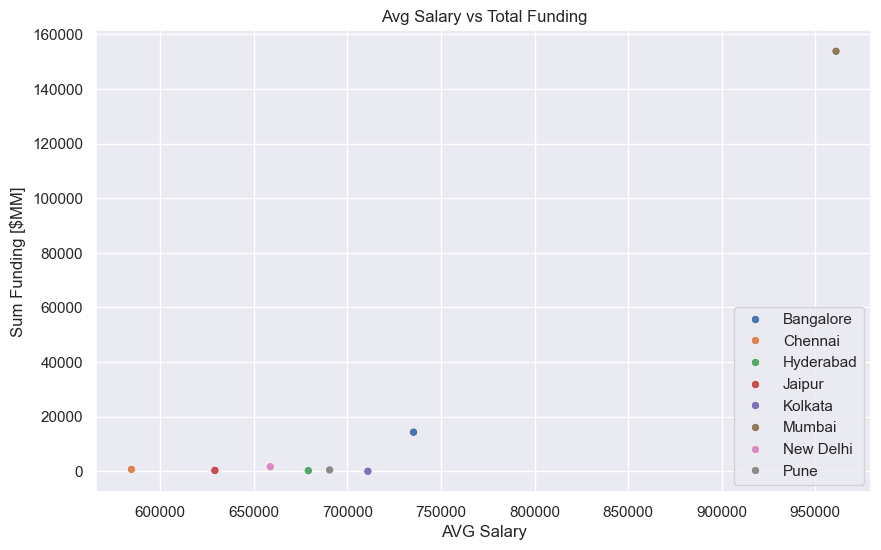

In [42]:
sns.set(rc={"figure.figsize": (10,6)})
sns.scatterplot(x="Avg Salary", y="Sum Funding ($MM)", hue="City", data=sps_fnd_loc)
plt.title("Avg Salary vs Total Funding")
plt.xlabel("AVG Salary")
plt.ylabel("Sum Funding [$MM]")
plt.legend(loc="lower right")
plt.show()
#Answer: Mumbai stands out in terms of total funding received by companies and salary paid to their employees